# **Bubble Plots**


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


####  Working with the Database
**Install and import the needed libraries**


In [25]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [26]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-06-12 12:30:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  66.7MB/s    in 2.3s    

2025-06-12 12:30:28 (66.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [27]:
print(sorted(df['SOPartFreq'].dropna().unique()))


['A few times per month or weekly', 'A few times per week', 'Daily or almost daily', 'I have never participated in Q&A on Stack Overflow', 'Less than once per month or monthly', 'Multiple times per day']


Number of rows to plot: 23349


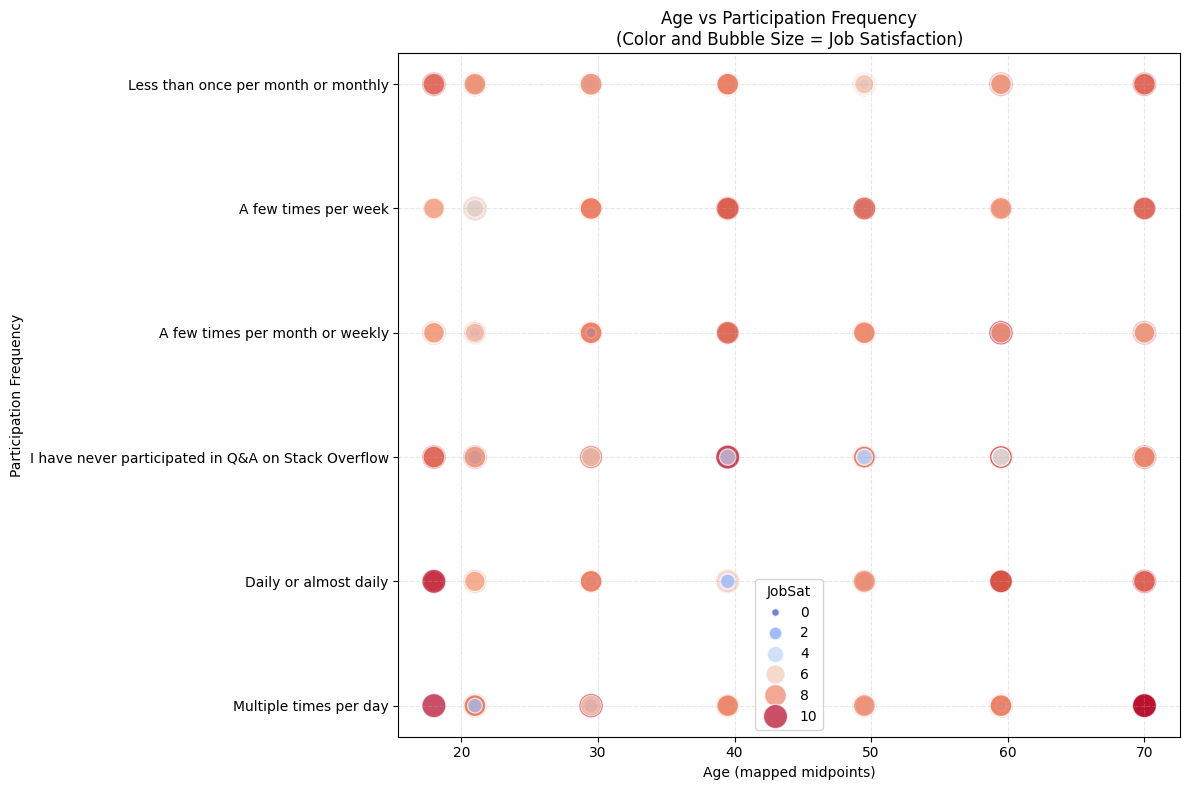

In [28]:
# --- Age mapping ---
age_mapping = {
    'Under 18 years old': 18,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
}
df['Age_mapped'] = df['Age'].map(age_mapping)

# Split and explode SOPartFreq types
df['SOPartFreq'] = df['SOPartFreq'].str.split(';')
df = df.explode('SOPartFreq')
df['SOPartFreq'] = df['SOPartFreq'].str.strip()  # remove extra spaces

# --- Convert JobSat to numeric safely ---
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# --- Drop rows with missing values ---
df_clean = df.dropna(subset=['Age_mapped', 'SOPartFreq', 'JobSat'])

# Optional: print number of rows to plot
print(f"Number of rows to plot: {len(df_clean)}")

# --- Plot ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clean,
    x='Age_mapped',
    y='SOPartFreq',
    size='JobSat',
    hue='JobSat',                # 👈 color by same value as size
    sizes=(30, 300),
    palette='coolwarm',          # or 'viridis', 'plasma', etc.
    alpha=0.7,
    legend='brief'
)

plt.title('Age vs Participation Frequency\n(Color and Bubble Size = Job Satisfaction)')
plt.xlabel('Age (mapped midpoints)')
plt.ylabel('Participation Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


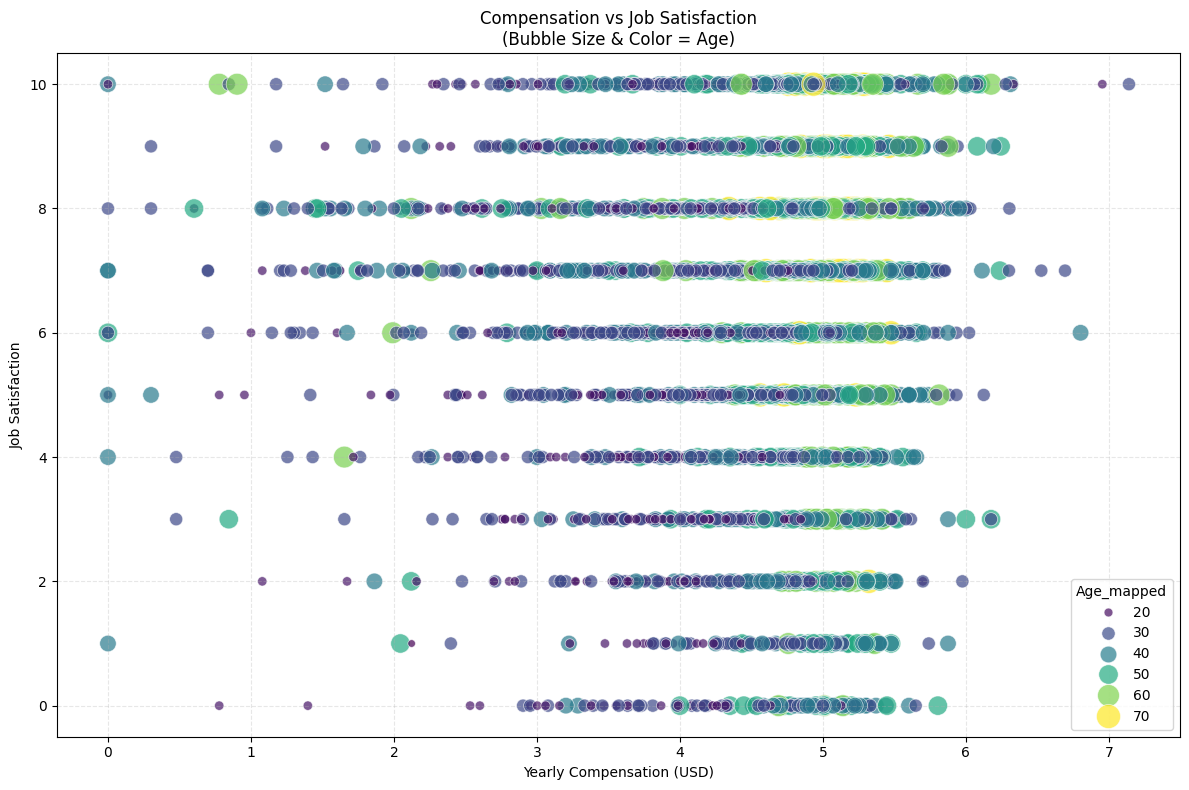

In [29]:
import numpy as np
# --- Convert compensation to numeric (remove invalid values) ---
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df[df['ConvertedCompYearly'] > 0]

# --- Map age to numeric midpoints ---
age_mapping = {
    'Under 18 years old': 18,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
}
df['Age_mapped'] = df['Age'].map(age_mapping)

# --- Convert JobSat to numeric ---
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
# Optional: Apply log scale to compensation (for wide salary range)
df['LogCompensation'] = np.log10(df['ConvertedCompYearly'])
# --- Drop rows with missing values ---
df_clean = df.dropna(subset=['LogCompensation', 'JobSat', 'Age_mapped'])

# --- Plot ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clean,
    x='LogCompensation',
    y='JobSat',
    size='Age_mapped',
    hue='Age_mapped',
    sizes=(30, 300),
    palette='viridis',
    alpha=0.7,
    legend='brief'
)

plt.title('Compensation vs Job Satisfaction\n(Bubble Size & Color = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



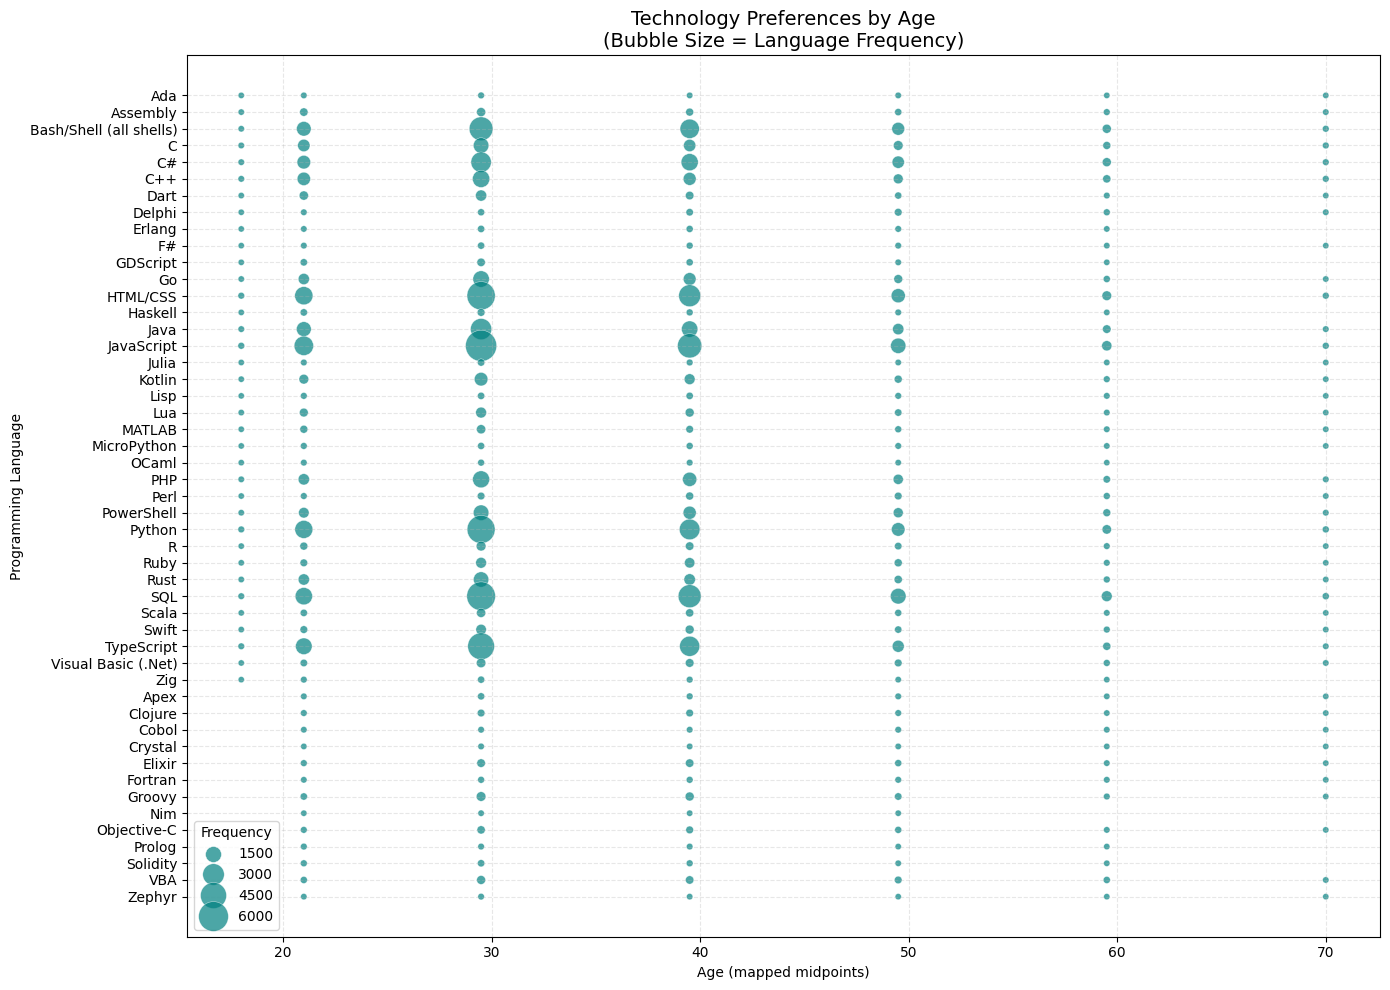

In [30]:
# --- Step 1: Map age to numeric midpoints ---
age_mapping = {
    'Under 18 years old': 18,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
}
df.loc[:, 'Age_mapped'] = df['Age'].map(age_mapping)

# --- Step 2: Drop missing values ---
df = df.dropna(subset=['Age_mapped', 'LanguageHaveWorkedWith'])

# --- Step 3: Split and explode programming languages ---
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df = df.explode('LanguageHaveWorkedWith')
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.strip()

# --- Step 4: Group and count frequency ---
lang_age_freq = df.groupby(['Age_mapped', 'LanguageHaveWorkedWith']).size().reset_index(name='Frequency')

# --- Step 5: Plot ---
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=lang_age_freq,
    x='Age_mapped',
    y='LanguageHaveWorkedWith',
    size='Frequency',
    sizes=(20, 500),
    alpha=0.7,
    color='teal',
    legend='brief'
)

plt.title('Technology Preferences by Age\n(Bubble Size = Language Frequency)', fontsize=14)
plt.xlabel('Age (mapped midpoints)')
plt.ylabel('Programming Language')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


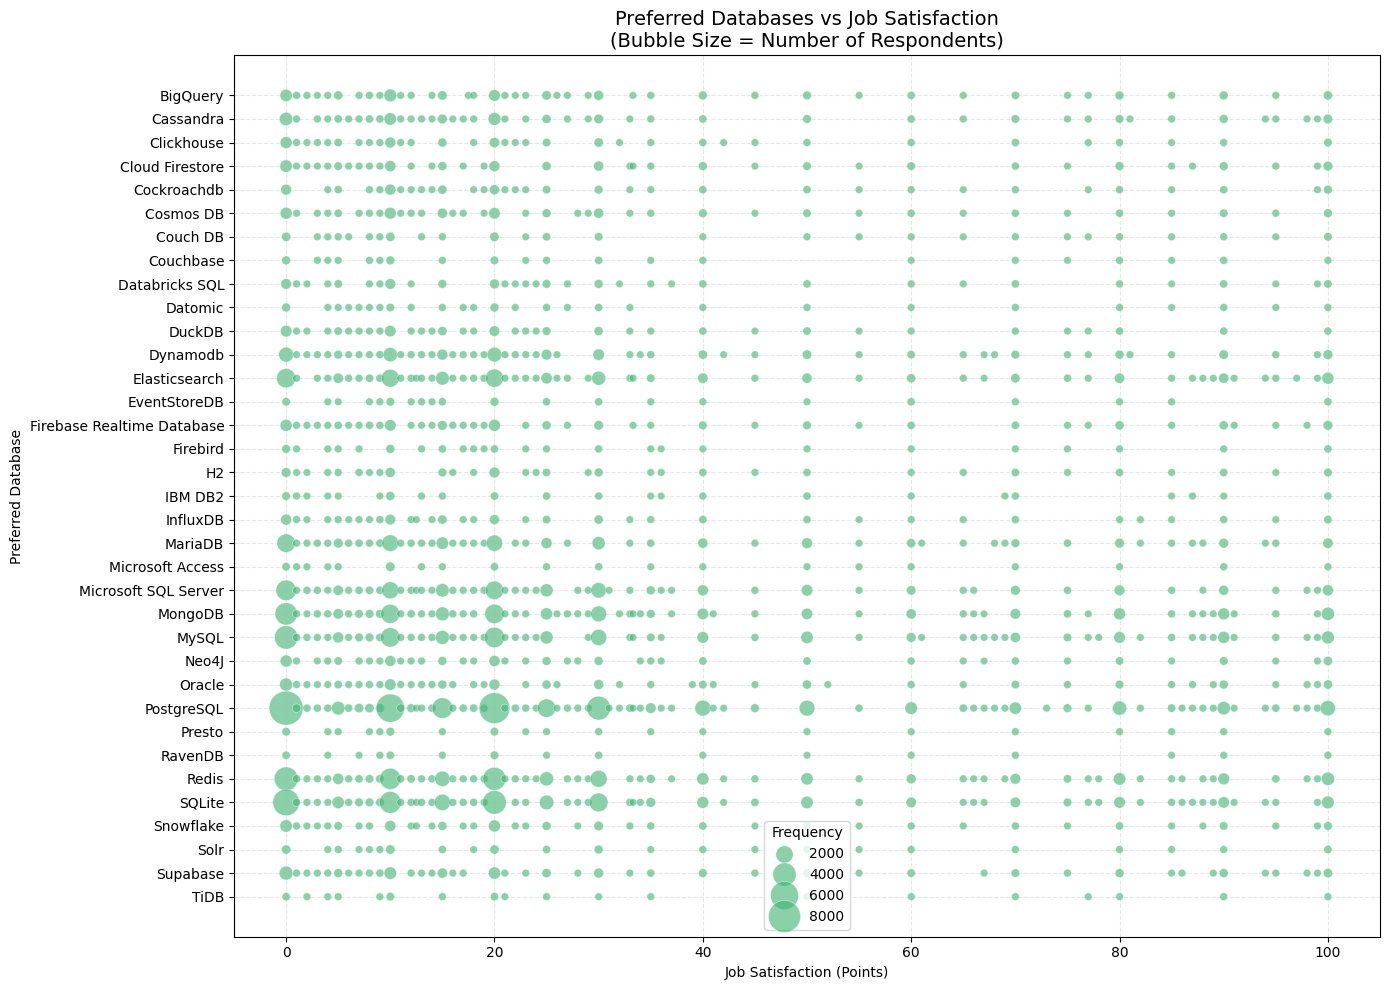

In [31]:
# --- Step 1: Drop missing values ---
df_db = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSatPoints_6'])

# --- Step 2: Explode the databases (they're separated by semicolons) ---
df_db.loc[:,'DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.split(';')
df_db = df_db.explode('DatabaseWantToWorkWith')


# --- Step 3: Round job satisfaction for grouping ---
df_db['JobSatPoints_6'] = pd.to_numeric(df_db['JobSatPoints_6'], errors='coerce')
df_db = df_db.dropna(subset=['JobSatPoints_6'])


# --- Step 4: Group and count frequency ---
grouped = df_db.groupby(['JobSatPoints_6', 'DatabaseWantToWorkWith']).size().reset_index(name='Frequency')

# --- Step 5: Plot ---
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=grouped,
    x='JobSatPoints_6',
    y='DatabaseWantToWorkWith',
    size='Frequency',
    sizes=(30, 600),
    alpha=0.6,
    color='mediumseagreen',
    legend='brief'
)

plt.title('Preferred Databases vs Job Satisfaction\n(Bubble Size = Number of Respondents)', fontsize=14)
plt.xlabel('Job Satisfaction (Points)')
plt.ylabel('Preferred Database')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


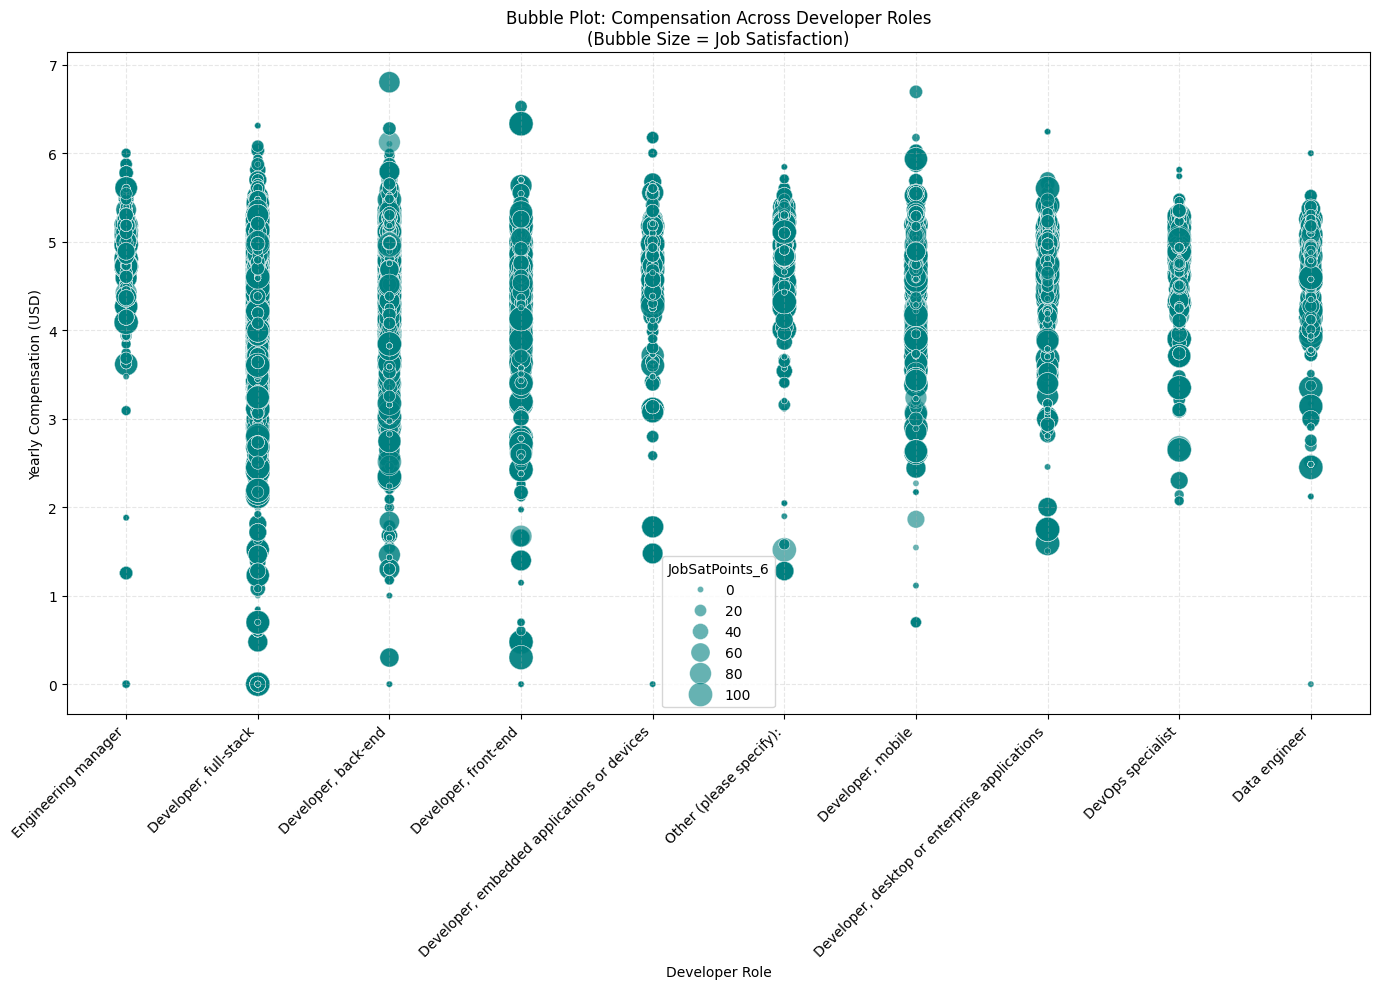

In [32]:


# Convert to numeric, coercing errors
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with NaN in those columns after conversion
df.dropna(subset=['ConvertedCompYearly','DevType', 'JobSatPoints_6'], inplace=True)

# Filter out extreme outliers in compensation
df = df[df['ConvertedCompYearly'] >0]

# Split and explode 'DevType' column
df['DevType'] = df['DevType'].str.split(';')
df = df.explode('DevType')
df['DevType'] = df['DevType'].str.strip()

# Keep top 10 most common developer roles
top_roles = df['DevType'].value_counts().nlargest(10).index
df = df[df['DevType'].isin(top_roles)]
df['LogCompensation'] = np.log10(df['ConvertedCompYearly'])
# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=df,
    x='DevType',
    y='LogCompensation',
    size='JobSatPoints_6',
    sizes=(20, 300),
    alpha=0.6,
    color='teal',
    legend='brief'
)

plt.xticks(rotation=45, ha='right')
plt.title('Bubble Plot: Compensation Across Developer Roles\n(Bubble Size = Job Satisfaction)')
plt.xlabel('Developer Role')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


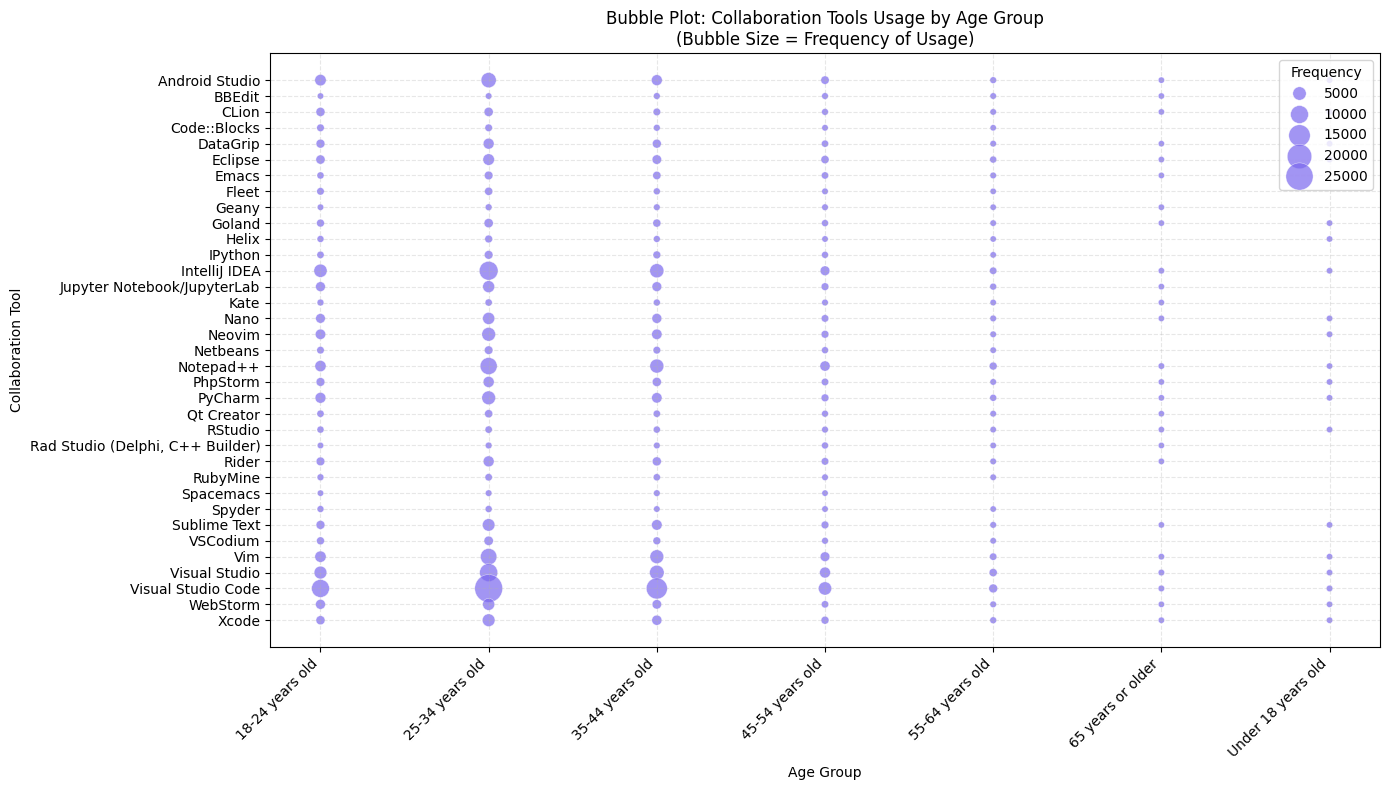

In [33]:
# Use original 'Age' column (categorical)
df['Age'] = df['Age'].astype('category')

# Explode collaboration tools as before
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].str.split(';')
df = df.explode('NEWCollabToolsHaveWorkedWith')
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].str.strip()

# Drop missing values
df_clean = df.dropna(subset=['Age', 'NEWCollabToolsHaveWorkedWith'])

# Calculate frequency by Age category and Tool
freq_df = df_clean.groupby(['Age', 'NEWCollabToolsHaveWorkedWith'], observed=True).size().reset_index(name='Frequency')

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=freq_df,
    x='Age',
    y='NEWCollabToolsHaveWorkedWith',
    size='Frequency',
    sizes=(20, 400),
    alpha=0.7,
    color='mediumslateblue'
)

plt.title('Bubble Plot: Collaboration Tools Usage by Age Group\n(Bubble Size = Frequency of Usage)')
plt.xlabel('Age Group')
plt.ylabel('Collaboration Tool')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



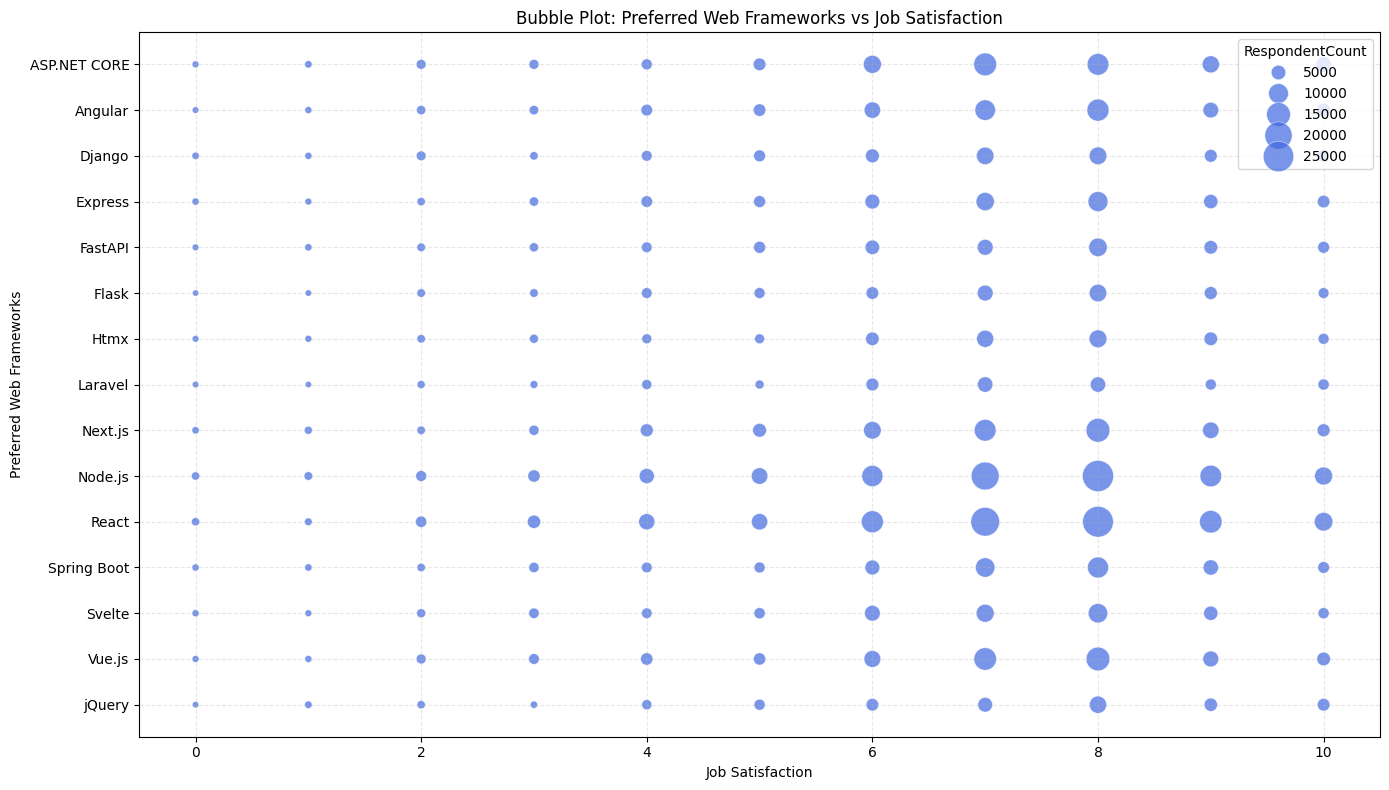

In [34]:
# Step 1: Drop missing values
df_clean = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Step 2: Split and explode the web frameworks
df_clean.loc[:,'WebframeWantToWorkWith'] = df_clean['WebframeWantToWorkWith'].str.split(';')
df_clean = df_clean.explode('WebframeWantToWorkWith')

# Step 3: Clean whitespace
df_clean['WebframeWantToWorkWith'] = df_clean['WebframeWantToWorkWith'].str.strip()

# Step 4: Group by framework and job satisfaction, count respondents
grouped = df_clean.groupby(['WebframeWantToWorkWith', 'JobSat']).size().reset_index(name='RespondentCount')

#  Sort and filter top frameworks to avoid clutter
top_frameworks = grouped.groupby('WebframeWantToWorkWith')['RespondentCount'].sum().nlargest(15).index
grouped = grouped[grouped['WebframeWantToWorkWith'].isin(top_frameworks)]

# Step 5: Plotting
plt.figure(figsize=(14, 8))
bubble_plot = sns.scatterplot(
    data=grouped,
    x='JobSat',
    y='WebframeWantToWorkWith',
    size='RespondentCount',
    sizes=(20, 500),
    alpha=0.7,
    legend='brief',
    color='royalblue'
)

plt.title('Bubble Plot: Preferred Web Frameworks vs Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Preferred Web Frameworks')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



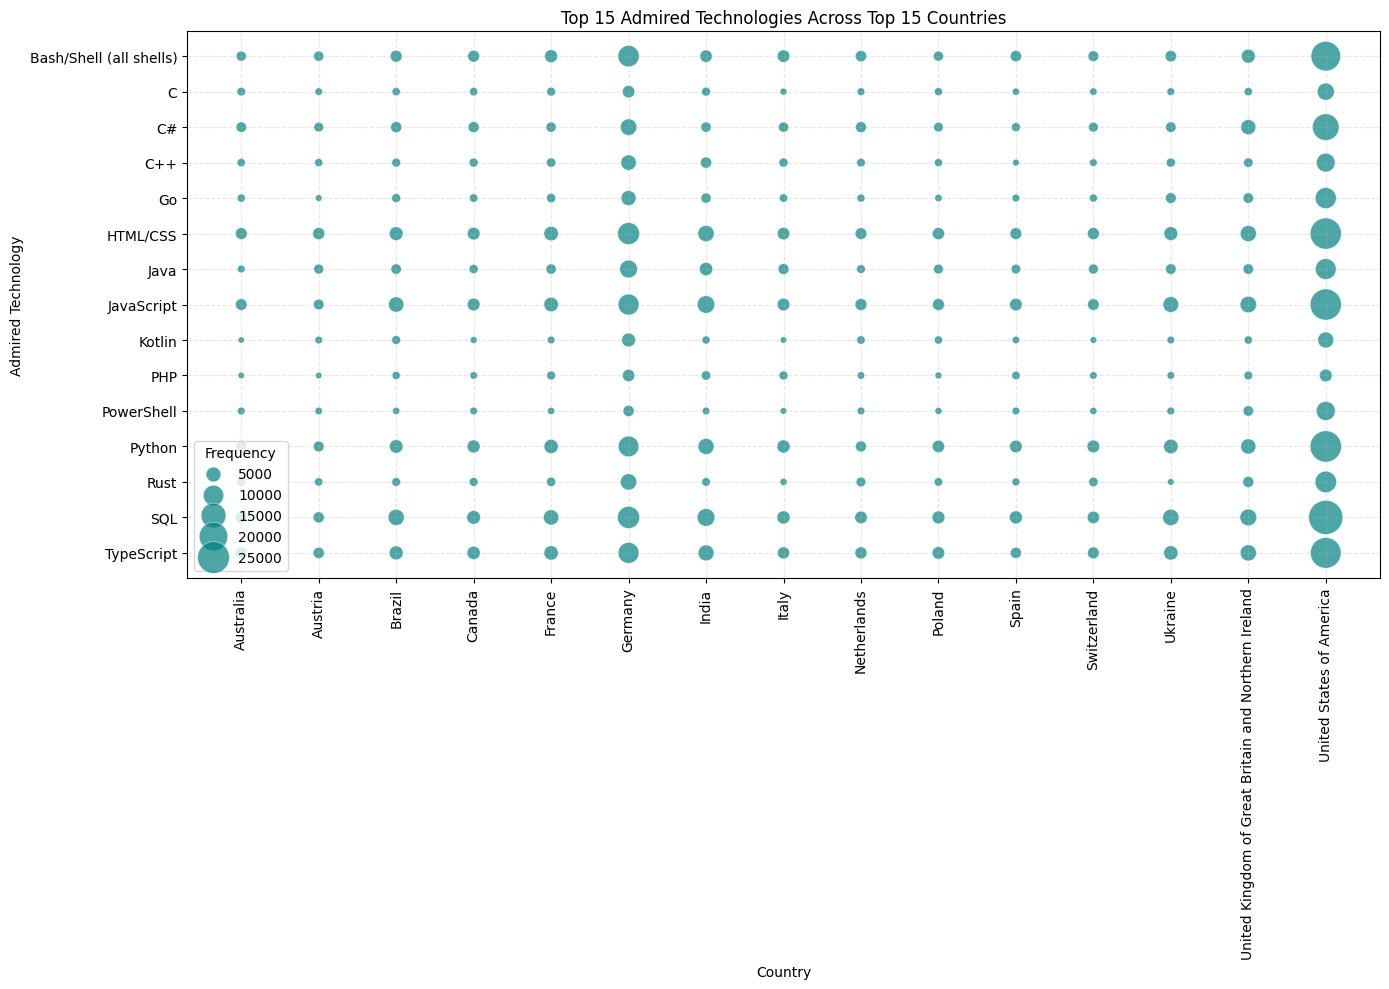

In [38]:
# Step 1: Drop missing values in relevant columns
df_clean = df.dropna(subset=['LanguageAdmired', 'Country'])

# Step 2: Split and explode admired languages
df_clean.loc[:,'LanguageAdmired'] = df_clean['LanguageAdmired'].str.split(';')
df_clean = df_clean.explode('LanguageAdmired')
df_clean['LanguageAdmired'] = df_clean['LanguageAdmired'].str.strip()

# Step 3: Calculate total counts per language and per country
top_languages = (
    df_clean.groupby('LanguageAdmired')
    .size()
    .nlargest(15)
    .index
)

top_countries = (
    df_clean.groupby('Country')
    .size()
    .nlargest(15)
    .index
)

# Step 4: Filter to top 15 languages and countries
filtered_df = df_clean[
    (df_clean['LanguageAdmired'].isin(top_languages)) &
    (df_clean['Country'].isin(top_countries))
]

# Step 5: Group by Country and LanguageAdmired, count frequencies
freq_df = filtered_df.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='Frequency')

# Step 6: Plot bubble plot
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=freq_df,
    x='Country',
    y='LanguageAdmired',
    size='Frequency',
    sizes=(20, 600),
    alpha=0.7,
    legend='brief',
    color='teal'
)

plt.title('Top 15 Admired Technologies Across Top 15 Countries')
plt.xlabel('Country')
plt.ylabel('Admired Technology')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='lower left', title='Frequency', frameon=True)
plt.tight_layout()
plt.show()